In [18]:
import pandas as pd
from pathlib import Path

In [19]:
path = Path("pred_output")

In [20]:
# load datasets with predictions
files = {
    "1.1.b.2.f.6m": "pred_set_1.1.b.2.f.6m.csv",
    "m1": "test results_2019.csv",
    "6m": "pred_set_6m.csv",
}

In [21]:
dfs = {}
for k, v in files.items():
    dfs[k] = pd.read_csv(path/v)
    dfs[k].set_index("NUM_SECU_EXPED", inplace=True)
    dfs[k].drop(columns=["Unnamed: 0"], inplace=True)

/home/voolkia/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (34,45,47,48,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
dfs["m1"].head()

,cond_04,cond_05,cond_06,cond_09,cond_11,cond_12,cond_32,cond_37,cond_C1,cond_C10,...,FECHA_DESDE,FECHA_NACIMIENTO,SEXO_ASEG,TIPO_ACTIVIDAD,CLIENTE,DOMICILIO_CODIGO_POSTAL,HABILITADO,DATECO_TIPO_ACTIVIDAD,CODIGO_NACION,prediction
NUM_SECU_EXPED,,,,,,,,,,,,,,,,,,,,,
1905896179999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011044
1905896259999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,2015-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000779
1905896279999,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,2015-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.412969
1905896299999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001064
1905896309999,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,2015-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001759


In [23]:
dfs["1.1.b.2.f.6m"]["prediction"].isna().mean()

0.0

In [24]:
df_merged = dfs["1.1.b.2.f.6m"].copy()

In [25]:
db = "m1"
df_merged[f"prediction_{db}"] = dfs[db]["prediction"]
df_merged[f"prediction_{db}"].isna().mean()

0.0

In [26]:
db = "6m"
df_merged[f"prediction_{db}"] = dfs[db]["prediction"]
df_merged[f"prediction_{db}"].isna().mean()

0.0

In [28]:
df_merged["FECHA_SINI"] = pd.to_datetime(df_merged["FECHA_SINI"], format="%Y/%m/%d")
df_merged["mes"] = df_merged["FECHA_SINI"].dt.month

In [30]:
file = Path("input_dataset")/ "INVESTIGACION.csv"
df_inv = pd.read_csv(file)

/home/voolkia/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df_merged["EXISTE_INVEST"] = False
df_merged["EXISTE_FRAUDE"] = False

In [32]:
df_merged.reset_index(inplace=True)

In [33]:
# invest
df_merged.loc[df_merged["NUM_SECU_EXPED"].isin(df_inv["NUM_SECU_EXPED"]),"EXISTE_INVEST"] = True

In [34]:
df_merged.loc[df_merged["NUM_SECU_EXPED"].isin(df_inv[df_inv["EXISTE_FRAUDE"] == "S"]["NUM_SECU_EXPED"]),"EXISTE_FRAUDE"] = True

In [35]:
col = "COD_CIA"

In [36]:
df_merged.loc[df_merged["NUM_SECU_EXPED"].isin(df_inv["NUM_SECU_EXPED"]),"EXISTE_INVEST"] = True

In [50]:
usecols = ["NUM_SECU_EXPED", "FECHA_SINI", "mes", "TIPO_EXPED", "total_condicion", "EXISTE_INVEST", "EXISTE_FRAUDE", "prediction", "prediction_m1", "prediction_6m"]
df_merged[usecols].head()

,NUM_SECU_EXPED,FECHA_SINI,mes,TIPO_EXPED,total_condicion,EXISTE_INVEST,EXISTE_FRAUDE,prediction,prediction_m1,prediction_6m
0,1905896179999,2019-01-01,1,10,0.0,False,False,0.005914,0.011044,0.011044
1,1905896259999,2019-01-01,1,3,0.0,False,False,0.004595,0.000779,0.000779
2,1905896279999,2019-01-01,1,60,0.0,True,True,0.268110,0.412969,0.005100
3,1905896299999,2019-01-01,1,10,0.0,False,False,0.005914,0.001064,0.001064
4,1905896309999,2019-01-01,1,2,0.0,False,False,0.052381,0.001759,0.001759


In [51]:
df_inv.columns

Index(['COD_CIA', 'COD_RAMO', 'NUM_SINI', 'NRO_EXPED', 'NRO_ORDEN_INV',
       'NRO_INVEST', 'COD_TALLER', 'IMPORTE', 'FECHA_INI_INVEST',
       'FECHA_ENT_INVEST', 'FECHA_FIN_INVEST', 'FECHA_MOD_INVEST',
       'EXISTE_INVEST', 'COD_INVEST_INT', 'COD_DOCUM_INVEST1', 'COD_INVEST1',
       'NOM_INVEST1', 'COD_DOCUM_INVEST2', 'COD_INVEST2', 'NOM_INVEST2',
       'COD_DOCUM_INVEST3', 'COD_INVEST3', 'NOM_INVEST3', 'COD_FRAUDE',
       'OBSERVACIONES', 'COMENTARIOS', 'CONCLUSIONES', 'NUM_SECU_SINI',
       'NUM_SECU_EXPED', 'FECHA_EQUIPO', 'COD_USR', 'COD_ABOGADO',
       'FECHA_VTO_PLAZO', 'CAUSA_DERIVACION', 'MOTIVO_DERIVACION',
       'EXISTE_FRAUDE', 'EXISTE_INHABILITAR', 'COD_AGEN_DERIV', 'CESVI_INF_OK',
       'IMPORTE_AHORRADO', 'SUB_COD_FRAUDE', 'TIPO_ABOGADO',
       'FECHA_DESISTIMIENTO'],
      dtype='object')

# save

In [52]:
df_merged[usecols].to_csv("predict_2019_all_models.csv")

# Load and analyse results

In [75]:
%matplotlib inline
def confusion_matrix_plot(y, y_pred):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    conf_mat = confusion_matrix(y, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="d")
    plt.show()

def predict_proba_range(y, start=0, end=1, step=0.05, normalize=False):
    # generator
    bins = list(map(lambda x: (round(x, 2), round(x+step, 2)), np.arange(start, end, step)))
    # adapt to contemplate equal to 0
    bins[0] = ((start-0.01), step)
    # convert in IntervalIndex to use pandas.cut
    bins = pd.IntervalIndex.from_tuples(bins)
    return pd.cut(y, bins).value_counts(dropna=False, normalize=normalize).sort_index()

def cut_range(y, start=0, end=1, step=0.05, normalize=False):
    # generator
    bins = list(map(lambda x: (round(x, 2), round(x+step, 2)), np.arange(start, end, step)))
    # adapt to contemplate equal to 0
    bins[0] = ((start-0.01), step)
    # convert in IntervalIndex to use pandas.cut
    bins = pd.IntervalIndex.from_tuples(bins)
    return pd.cut(y, bins)

def plot_predict_proba_range(range_predict, exclude=None):
    """Bar plot range predictions.

    Parameters
    ----------
    range_predict: pd.Series
       sorted range and distribution.

    exclude: {'left', 'right', 'both', None} (default: None)
       avoids plot extremes {'left', 'right', 'both', None}.
           left: avoids lower extreme,
           right: avoids upper extreme,
           both: avoids lower and upper extreme,
           None: shows all.

    """
    # TODO: ADD ascending or descending order
    left, right = None, None
    if exclude in ["left", "both"]:
       left = 1
    if exclude in ["right", "both"]:
       right = -1
    range_pred.iloc[left:right].plot.barh()


In [54]:
df = pd.read_csv("predict_2019_all_models.csv")
df.head()

,Unnamed: 0,NUM_SECU_EXPED,FECHA_SINI,mes,TIPO_EXPED,total_condicion,EXISTE_INVEST,EXISTE_FRAUDE,prediction,prediction_m1,prediction_6m
0,0,1905896179999,2019-01-01,1,10,0.0,False,False,0.005914,0.011044,0.011044
1,1,1905896259999,2019-01-01,1,3,0.0,False,False,0.004595,0.000779,0.000779
2,2,1905896279999,2019-01-01,1,60,0.0,True,True,0.268110,0.412969,0.005100
3,3,1905896299999,2019-01-01,1,10,0.0,False,False,0.005914,0.001064,0.001064
4,4,1905896309999,2019-01-01,1,2,0.0,False,False,0.052381,0.001759,0.001759


In [55]:
model_cols = ["prediction", "prediction_m1", "prediction_6m"]

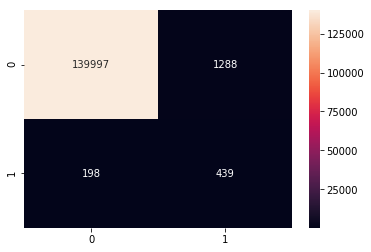

In [56]:
confusion_matrix_plot(df["EXISTE_FRAUDE"], df["total_condicion"] >= 5)

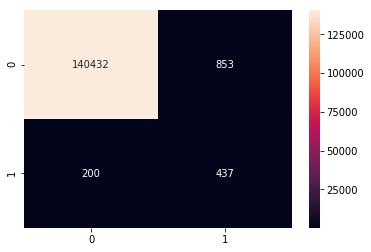

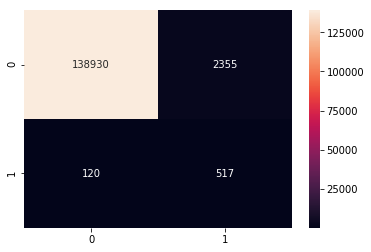

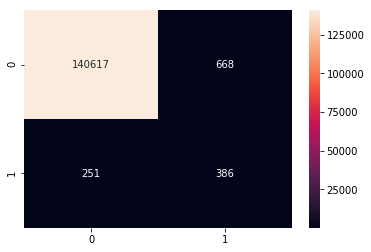

In [57]:
for col in model_cols:
    confusion_matrix_plot(df["EXISTE_FRAUDE"], df[col] > 0.5)

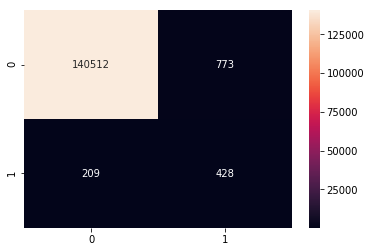

In [70]:
confusion_matrix_plot(df["EXISTE_FRAUDE"],  df["prediction"]> 0.6)

In [128]:
for col in model_cols:
    print(col)
    print(pd.crosstab([df["EXISTE_FRAUDE"], df["TIPO_EXPED"]], [df[col] > 0.5]))

prediction
prediction                False  True 
EXISTE_FRAUDE TIPO_EXPED              
False         1             694      0
              2           10353      0
              3           61073      0
              10          55490      0
              20           1859      0
              50           1680      0
              60           9283    853
True          1               2      0
              2               9      0
              3               3      0
              10              7      0
              20              3      0
              50             41      0
              60            135    437
prediction_m1
prediction_m1             False  True 
EXISTE_FRAUDE TIPO_EXPED              
False         1             693      1
              2           10349      4
              3           61073      0
              10          55490      0
              20           1857      2
              50           1008    672
              60           8460   1676


Predicción con %35.0


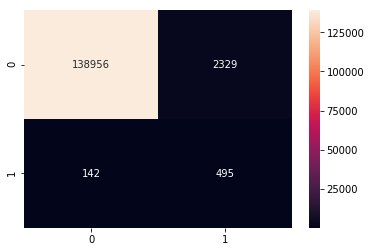

Predicción con %40.0


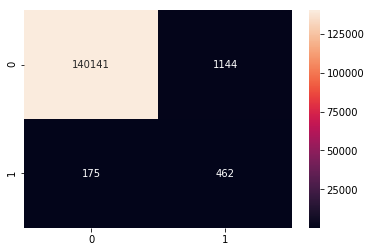

Predicción con %50.0


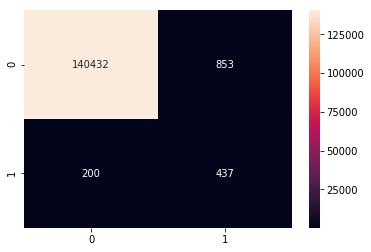

Predicción con %55.0


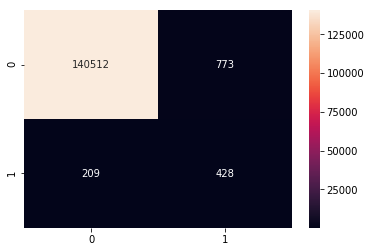

Predicción con %60.0


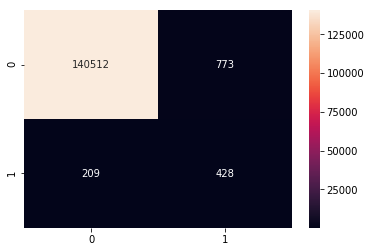

Predicción con %65.0


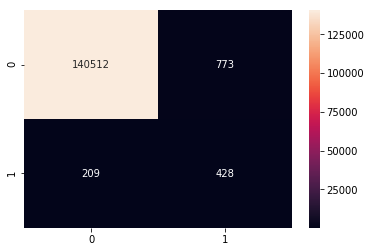

Predicción con %70.0


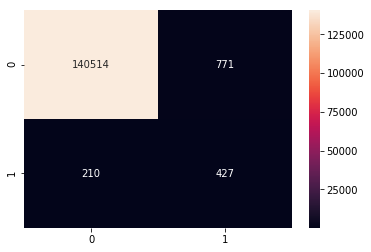

Predicción con %80.0


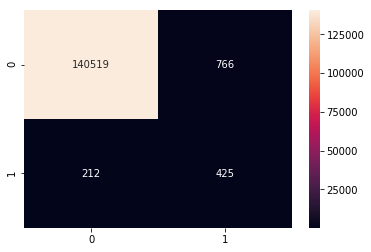

In [71]:
for p in [0.35, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8]:
    print(f"Predicción con %{round(p* 100,0)}")
    confusion_matrix_plot(df["EXISTE_FRAUDE"], df["prediction"] > p)

Predicción con %10.0


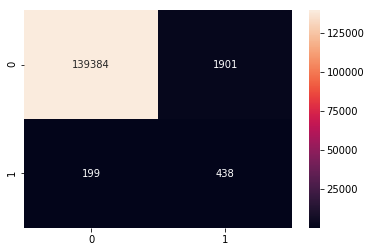

Predicción con %15.0


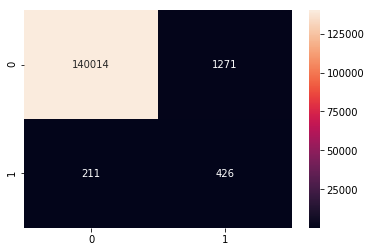

Predicción con %20.0


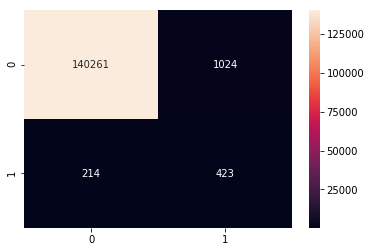

Predicción con %25.0


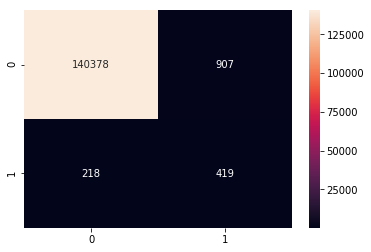

Predicción con %35.0


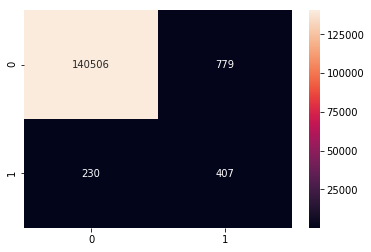

Predicción con %40.0


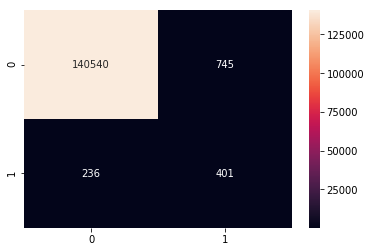

Predicción con %50.0


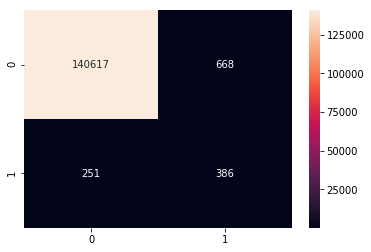

Predicción con %55.0


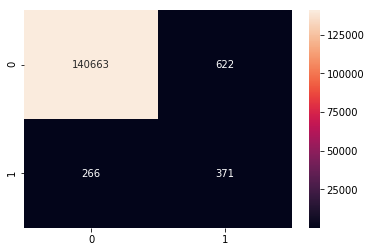

Predicción con %60.0


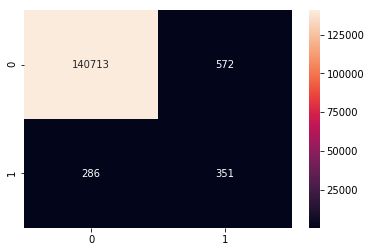

Predicción con %65.0


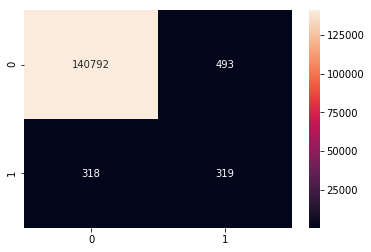

Predicción con %70.0


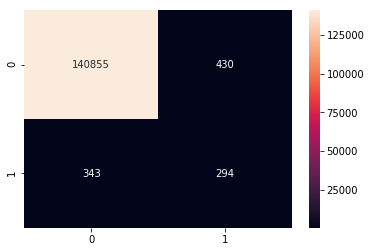

Predicción con %80.0


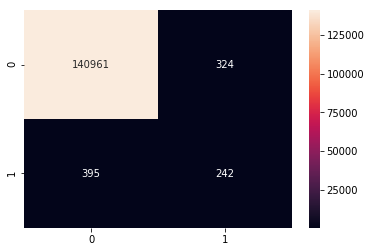

In [83]:
for p in [0.1, 0.15, 0.2, 0.25, 0.35, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8]:
    print(f"Predicción con %{round(p* 100,0)}")
    confusion_matrix_plot(df["EXISTE_FRAUDE"], df["prediction_6m"] > p)

In [88]:
pd.crosstab([df["EXISTE_FRAUDE"], df["TIPO_EXPED"],  df["total_condicion"] >= 5], [df["prediction"] > 0.4])

prediction                                False  True 
EXISTE_FRAUDE TIPO_EXPED total_condicion              
False         1          False              689      0
                         True                 5      0
              2          False            10272      0
                         True                81      0
              3          False            61063      0
                         True                10      0
              10         False            55488      0
                         True                 2      0
              20         False             1859      0
              50         False             1263      0
                         True               383     34
              60         False             9026    337
                         True                 0    773
True          1          False                2      0
              2          False                9      0
              3          False                3      0
              10         False                7      0
              20         False                3      0
              50         False               30      0
                         True                 9      2
              60         False              112     32
                         True                 0    428

In [89]:
pd.crosstab([df["EXISTE_FRAUDE"], df["TIPO_EXPED"],  df["total_condicion"] >= 5], [df["prediction_6m"] > 0.45])

prediction_6m                             False  True 
EXISTE_FRAUDE TIPO_EXPED total_condicion              
False         1          False              688      1
                         True                 5      0
              2          False            10261     11
                         True                81      0
              3          False            61063      0
                         True                10      0
              10         False            55488      0
                         True                 2      0
              20         False             1853      6
              50         False             1256      7
                         True               393     24
              60         False             9358      5
                         True               114    659
True          1          False                2      0
              2          False                7      2
              3          False                3      0
              10         False                5      2
              20         False                1      2
              50         False               29      1
                         True                10      1
              60         False              144      0
                         True                39    389

In [78]:
pd.crosstab([cut_range(df["prediction"])], df["EXISTE_FRAUDE"])

EXISTE_FRAUDE,False,True
prediction,,
"(-0.01, 0.05]",124270,20
"(0.05, 0.1]",5153,4
"(0.1, 0.15]",5,0
"(0.15, 0.2]",5419,29
"(0.2, 0.25]",941,15
"(0.25, 0.3]",1971,38
"(0.3, 0.35]",1197,36
"(0.35, 0.4]",1185,33
"(0.4, 0.45]",135,12


In [79]:
pd.crosstab([cut_range(df["prediction_6m"])], df["EXISTE_FRAUDE"])

EXISTE_FRAUDE,False,True
prediction_6m,,
"(-0.01, 0.05]",136791,179
"(0.05, 0.1]",2593,20
"(0.1, 0.15]",630,12
"(0.15, 0.2]",247,3
"(0.2, 0.25]",117,4
"(0.25, 0.3]",72,7
"(0.3, 0.35]",56,5
"(0.35, 0.4]",34,6
"(0.4, 0.45]",32,4


In [80]:
y_comb = (df["prediction_6m"] + df["prediction"]) / 2
pd.crosstab([cut_range(y_comb)], df["EXISTE_FRAUDE"])

EXISTE_FRAUDE,False,True
row_0,,
"(-0.01, 0.05]",127555,15
"(0.05, 0.1]",6483,27
"(0.1, 0.15]",3238,52
"(0.15, 0.2]",2201,59
"(0.2, 0.25]",602,28
"(0.25, 0.3]",295,19
"(0.3, 0.35]",59,1
"(0.35, 0.4]",40,3
"(0.4, 0.45]",28,4


## Making new model

In [100]:
df["prediction_6m_1.1.b.2.f.6m"] = df["prediction_6m"]

In [99]:
indx = (df[df["TIPO_EXPED"] == 60]).index
df.loc[indx, "TIPO_EXPED"].value_counts()

60    10708
Name: TIPO_EXPED, dtype: int64

In [101]:
indx = (df[df["TIPO_EXPED"] == 60]).index
df.loc[indx, "prediction_6m_1.1.b.2.f.6m"] = df.loc[indx, "prediction"]

Predicción con %10.0


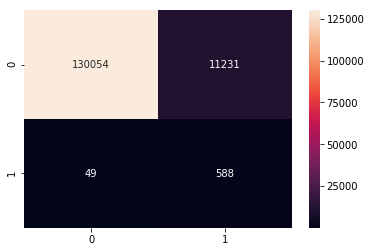

Predicción con %15.0


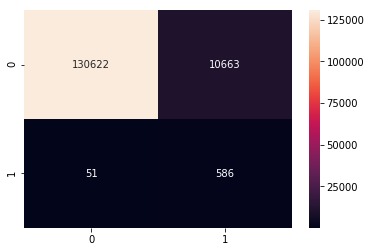

Predicción con %20.0


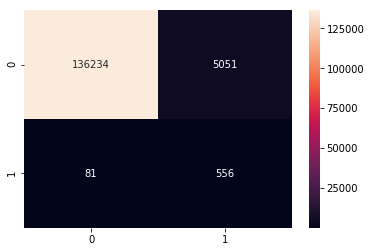

Predicción con %25.0


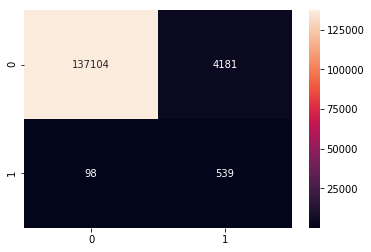

Predicción con %35.0


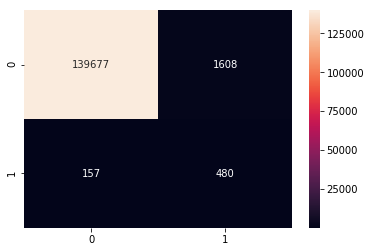

Predicción con %40.0


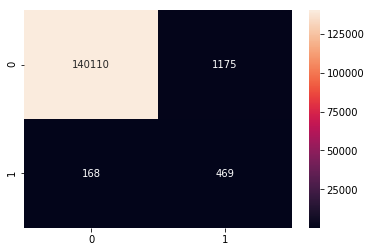

Predicción con %45.0


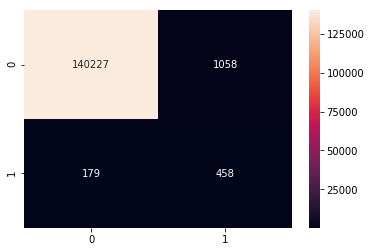

Predicción con %50.0


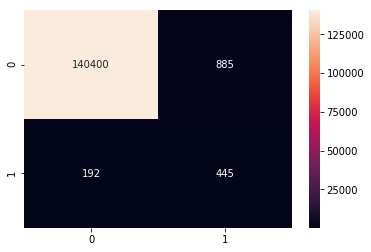

Predicción con %55.0


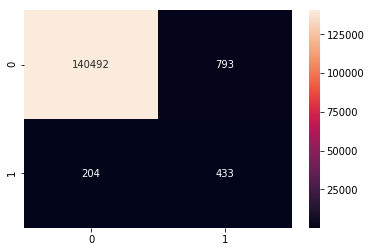

Predicción con %60.0


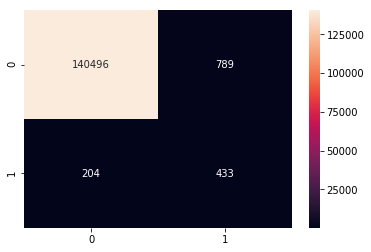

Predicción con %65.0


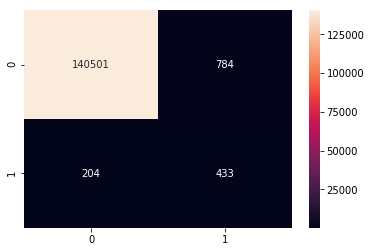

Predicción con %70.0


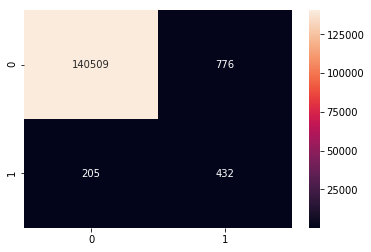

Predicción con %80.0


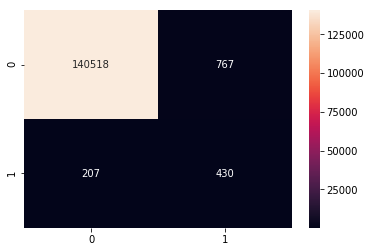

In [131]:
for p in [0.1, 0.15, 0.2, 0.25, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8]:
    print(f"Predicción con %{round(p* 100,0)}")
    confusion_matrix_plot(df["EXISTE_FRAUDE"], df["prediction_6m_1.1.b.2.f.6m"] > p)

In [135]:
pd.crosstab([cut_range(df["prediction_6m_1.1.b.2.f.6m"], step=0.1)], df["EXISTE_FRAUDE"])

EXISTE_FRAUDE,False,True
prediction_6m_1.1.b.2.f.6m,,
"(-0.01, 0.1]",130054,49
"(0.1, 0.2]",6180,32
"(0.2, 0.3]",2227,40
"(0.3, 0.4]",1649,47
"(0.4, 0.5]",290,24
"(0.5, 0.6]",96,12
"(0.6, 0.7]",13,1
"(0.7, 0.8]",9,2
"(0.8, 0.9]",461,201


In [1]:
len(df)

NameError: name 'df' is not defined

In [137]:
pd.crosstab([df["EXISTE_FRAUDE"], df["TIPO_EXPED"],  df["total_condicion"] >= 5], [df["prediction_6m_1.1.b.2.f.6m"] > 0.35])

prediction_6m_1.1.b.2.f.6m                False  True 
EXISTE_FRAUDE TIPO_EXPED total_condicion              
False         1          False              688      1
                         True                 5      0
              2          False            10255     17
                         True                81      0
              3          False            61062      1
                         True                10      0
              10         False            55484      4
                         True                 2      0
              20         False             1846     13
              50         False             1254      9
                         True               378     39
              60         False             8612    751
                         True                 0    773
True          1          False                2      0
              2          False                7      2
              3          False                3      0
              10         False                5      2
              20         False                1      2
              50         False               29      1
                         True                 9      2
              60         False              101     43
                         True                 0    428

In [106]:
from sklearn.metrics import f1_score, roc_auc_score

In [112]:
y_pred=df["prediction_6m_1.1.b.2.f.6m"] > 0.5

f1_score(y_true=df["EXISTE_FRAUDE"], y_pred=y_pred), roc_auc_score(df["EXISTE_FRAUDE"], df["prediction_6m_1.1.b.2.f.6m"])

(0.4524656837824098, 0.9671259074243922)

In [114]:
f1_score(y_true=df["EXISTE_FRAUDE"], y_pred=df["prediction_6m"] > 0.5), roc_auc_score(df["EXISTE_FRAUDE"], df["prediction_6m"])

(0.4565345949142519, 0.8860181184040252)

In [115]:
f1_score(y_true=df["EXISTE_FRAUDE"], y_pred=df["prediction"] > 0.5), roc_auc_score(df["EXISTE_FRAUDE"], df["prediction"])

(0.45355474831344056, 0.979273192694393)

In [133]:
to_drop = ["avg_prediction_6m_1.1.b.2.f.6m", "Unnamed: 0"]
df.drop(columns=to_drop, inplace=True)
df.head()

,NUM_SECU_EXPED,FECHA_SINI,mes,TIPO_EXPED,total_condicion,EXISTE_INVEST,EXISTE_FRAUDE,prediction,prediction_m1,prediction_6m,prediction_6m_1.1.b.2.f.6m
0,1905896179999,2019-01-01,1,10,0.0,False,False,0.005914,0.011044,0.011044,0.011044
1,1905896259999,2019-01-01,1,3,0.0,False,False,0.004595,0.000779,0.000779,0.000779
2,1905896279999,2019-01-01,1,60,0.0,True,True,0.268110,0.412969,0.005100,0.268110
3,1905896299999,2019-01-01,1,10,0.0,False,False,0.005914,0.001064,0.001064,0.001064
4,1905896309999,2019-01-01,1,2,0.0,False,False,0.052381,0.001759,0.001759,0.001759


In [134]:
df.to_csv("pred_solo_2019_new_model_comb.csv")

## new model avg

In [122]:
df["avg_prediction_6m_1.1.b.2.f.6m"] = df["prediction_6m"]

In [123]:
indx = (df[df["TIPO_EXPED"] >= 50]).index
df.loc[indx, "avg_prediction_6m_1.1.b.2.f.6m"] = df.loc[indx, "prediction"]

In [124]:
f1_score(y_true=df["EXISTE_FRAUDE"], y_pred=df["avg_prediction_6m_1.1.b.2.f.6m"] > 0.5), roc_auc_score(df["EXISTE_FRAUDE"], df["avg_prediction_6m_1.1.b.2.f.6m"])

(0.45670103092783504, 0.9833076634738929)

Predicción con %10.0


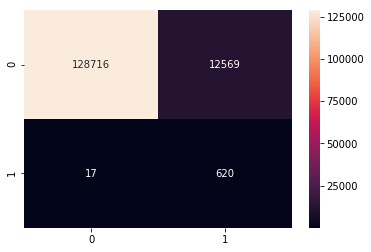

Predicción con %15.0


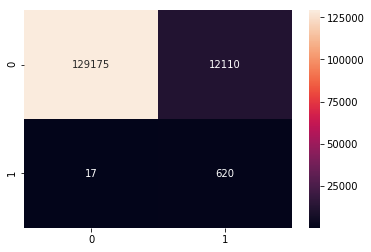

Predicción con %20.0


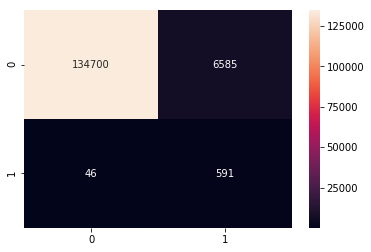

Predicción con %25.0


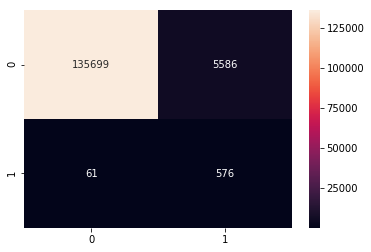

Predicción con %35.0


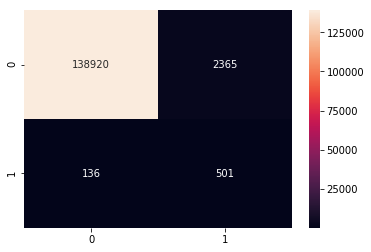

Predicción con %40.0


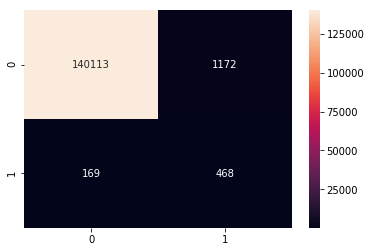

Predicción con %50.0


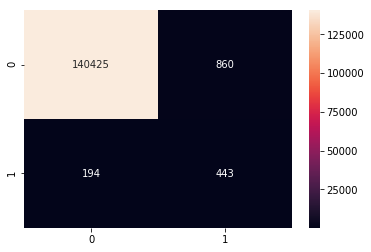

Predicción con %55.0


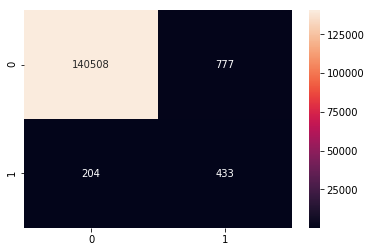

Predicción con %60.0


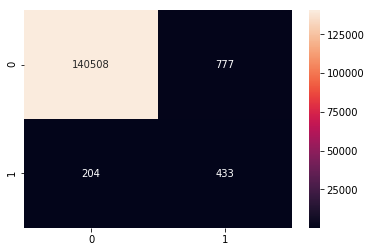

Predicción con %65.0


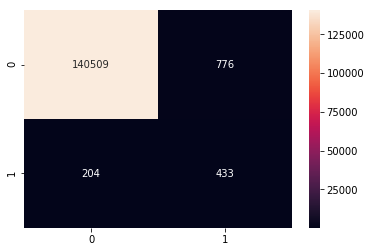

Predicción con %70.0


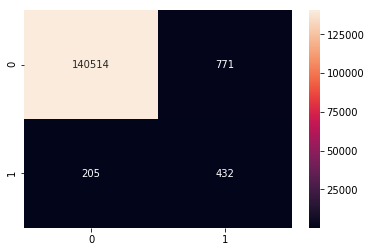

Predicción con %80.0


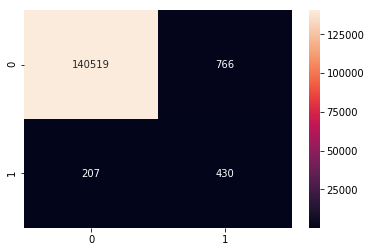

In [125]:
for p in [0.1, 0.15, 0.2, 0.25, 0.35, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8]:
    print(f"Predicción con %{round(p* 100,0)}")
    confusion_matrix_plot(df["EXISTE_FRAUDE"], df["avg_prediction_6m_1.1.b.2.f.6m"] > p)

In [126]:
pd.crosstab([cut_range(df["avg_prediction_6m_1.1.b.2.f.6m"])], df["EXISTE_FRAUDE"])

EXISTE_FRAUDE,False,True
avg_prediction_6m_1.1.b.2.f.6m,,
"(-0.01, 0.05]",126640,13
"(0.05, 0.1]",2076,4
"(0.1, 0.15]",459,0
"(0.15, 0.2]",5525,29
"(0.2, 0.25]",999,15
"(0.25, 0.3]",2005,39
"(0.3, 0.35]",1216,36
"(0.35, 0.4]",1193,33
"(0.4, 0.45]",145,12


In [127]:
pd.crosstab([df["EXISTE_FRAUDE"], df["TIPO_EXPED"],  df["total_condicion"] >= 5], [df["avg_prediction_6m_1.1.b.2.f.6m"] > 0.5])

avg_prediction_6m_1.1.b.2.f.6m            False  True 
EXISTE_FRAUDE TIPO_EXPED total_condicion              
False         1          False              688      1
                         True                 5      0
              2          False            10268      4
                         True                81      0
              3          False            61063      0
                         True                10      0
              10         False            55488      0
                         True                 2      0
              20         False             1857      2
              50         False             1263      0
                         True               417      0
              60         False             9283     80
                         True                 0    773
True          1          False                2      0
              2          False                7      2
              3          False                3      0
              10         False                5      2
              20         False                1      2
              50         False               30      0
                         True                11      0
              60         False              135      9
                         True                 0    428